In [47]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import statsmodels.tsa.arima.model
import os
print(os.getcwd())

/Users/pragatipriya/Documents/Python


In [49]:
data = pd.read_csv(r"/Users/pragatipriya/Documents/Python/train.csv", sep=None, engine="python", on_bad_lines="error")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [51]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [52]:
retail_data = data.copy()
retail_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [53]:
retail_data["Postal Code"] = retail_data["Postal Code"].fillna(00000.0) #at this stage Postal Code is not important for model building so I have filled with 0
retail_data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [54]:
# Changing date type
retail_data["Order Date"] = pd.to_datetime(retail_data["Order Date"], format="%d/%m/%Y", errors="coerce")
retail_data["Ship Date"] = pd.to_datetime(retail_data["Ship Date"], format="%d/%m/%Y", errors="coerce")
retail_data = retail_data.sort_values("Order Date").reset_index(drop=True) #sorted it by date
retail_data = retail_data.drop(columns=["index", "level_0"], errors="ignore") #removed unnecessary columns with similar info 

retail_data["Year"] = retail_data["Order Date"].dt.year
retail_data["Quarter"] = retail_data["Order Date"].dt.quarter
retail_data["Month"] = retail_data["Order Date"].dt.month
retail_data["Month_name"] = retail_data["Order Date"].dt.month_name()
retail_data["Day_of_month"] = retail_data["Order Date"].dt.day
retail_data["Day_of_year"] = retail_data["Order Date"].dt.dayofyear
retail_data["Day_of_week"] = retail_data["Order Date"].dt.weekday
retail_data["Weekday_name"] = retail_data["Order Date"].dt.day_name()
iso = retail_data["Order Date"].dt.isocalendar()
retail_data["Week_of_year"] = iso.week.astype(int)
retail_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Year,Quarter,Month,Month_name,Day_of_month,Day_of_year,Day_of_week,Weekday_name,Week_of_year
0,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,16.448,2015,1,1,January,3,3,5,Saturday,1
1,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,3.540,2015,1,1,January,4,4,6,Sunday,1
2,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,272.736,2015,1,1,January,4,4,6,Sunday,1
3,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,11.784,2015,1,1,January,4,4,6,Sunday,1
4,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19.536,2015,1,1,January,5,5,0,Monday,2


In [55]:
retail_data["Country"].unique()

array(['United States'], dtype=object)

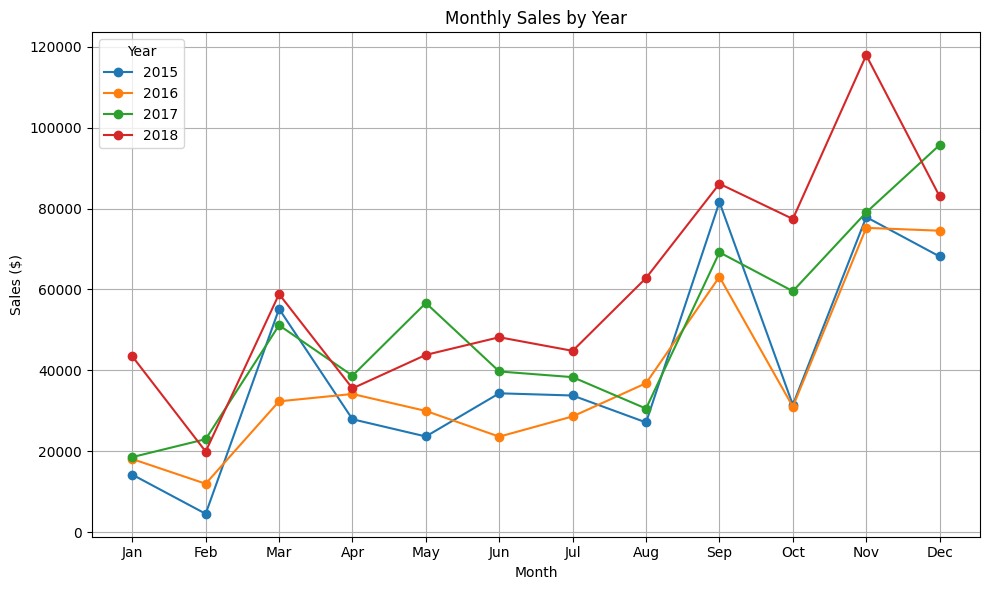

In [56]:
## MONTHLY SALES BY YEAR ## 
monthly_yearly_avg = retail_data.groupby(["Year", "Month"])["Sales"].sum().reset_index()
pivot_table = monthly_yearly_avg.pivot(index="Month", columns="Year", values="Sales")


plt.figure(figsize=(10,6))
for Year in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[Year], marker="o", label=str(Year))

plt.xticks(range(1,13), 
           [pd.to_datetime(str(m), format="%m").strftime("%b") for m in range(1,13)])

plt.title("Monthly Sales by Year")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()
plt.show()

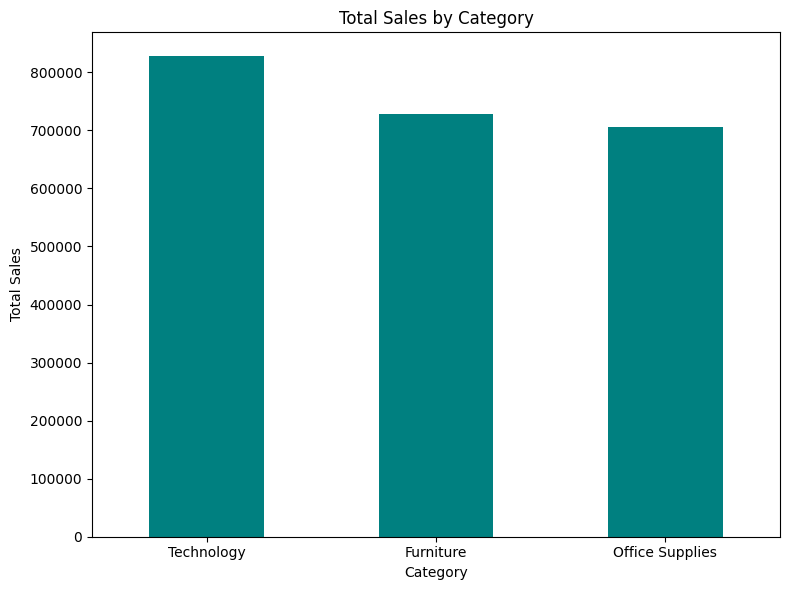

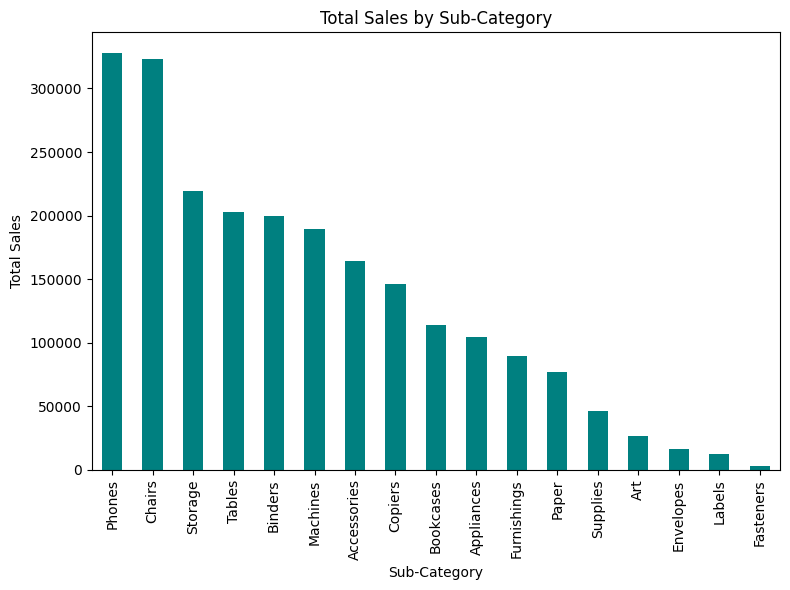

In [57]:
## TOTAL SALES BY CATEGORY ## 
category_sales = retail_data.groupby("Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
category_sales.plot(kind="bar", color="teal")

plt.title("Total Sales by Category", fontsize=12)
plt.xlabel("Category", fontsize=10)
plt.ylabel("Total Sales", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

## TOTAL SALES BY SUB-CATEGORY ## 
sub_category_sales = retail_data.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sub_category_sales.plot(kind="bar", color="teal")

plt.title("Total Sales by Sub-Category", fontsize=12)
plt.xlabel("Sub-Category", fontsize=10)
plt.ylabel("Total Sales", fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

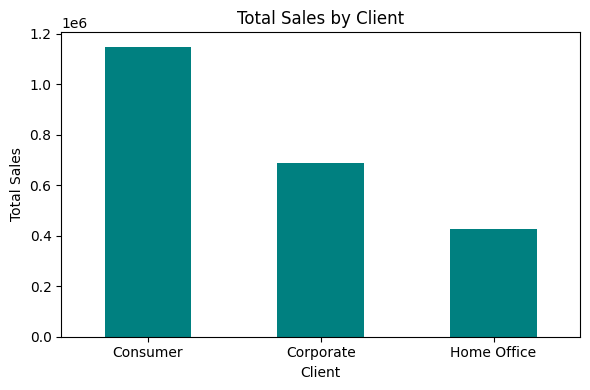

In [58]:
## TOTAL SALES BY CLIENT ##
client_sales = retail_data.groupby("Segment")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
client_sales.plot(kind="bar", color="teal")

plt.title("Total Sales by Client", fontsize=12)
plt.xlabel("Client", fontsize=10)
plt.ylabel("Total Sales", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

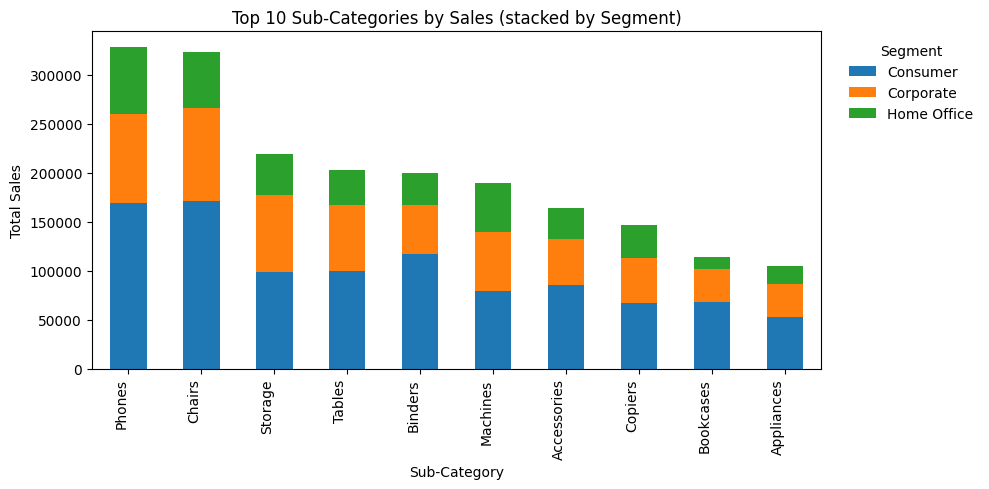

In [59]:
## TOP 10 ##
seg_sub = (retail_data
           .groupby(["Segment", "Sub-Category"], as_index=False)["Sales"]
           .sum())
pivot = seg_sub.pivot(index="Sub-Category", columns="Segment", values="Sales").fillna(0)

top10 = pivot.assign(Total=pivot.sum(axis=1)).sort_values("Total", ascending=False).head(10)
top10 = top10.drop(columns="Total")

ax = top10.plot(kind="bar", stacked=True, figsize=(10,5))
ax.set_title("Top 10 Sub-Categories by Sales (stacked by Segment)")
ax.set_xlabel("Sub-Category")
ax.set_ylabel("Total Sales")
ax.legend(title="Segment", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

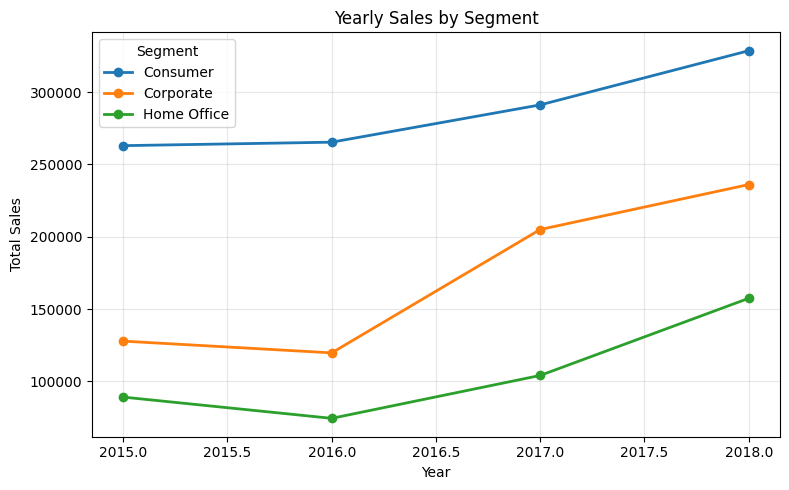

In [60]:
## YEARLY SALES BY SEGMENT ##
seg_yearly = (retail_data
          .groupby(["Segment", "Year"], as_index=False)["Sales"].sum())
yearly_piv = seg_yearly.pivot(index="Year", columns="Segment", values="Sales")
yearly_piv.plot(marker="o", linewidth=2, figsize=(8,5))


plt.title("Yearly Sales by Segment")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

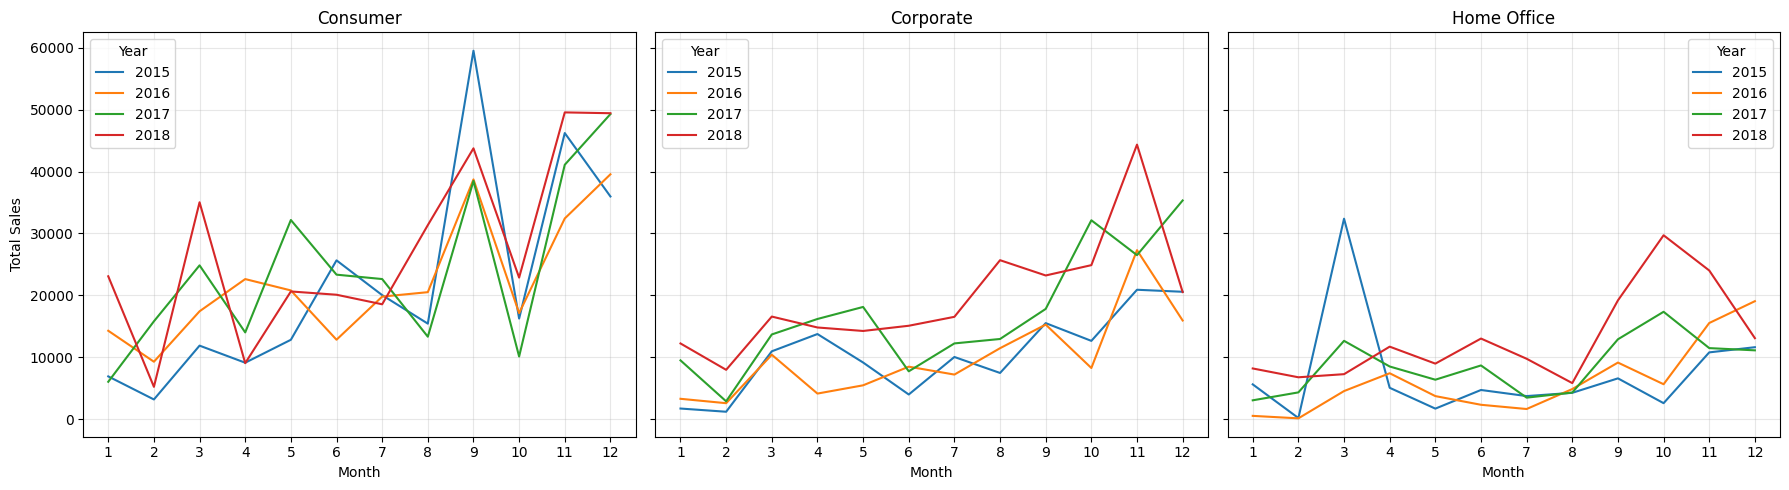

In [61]:
## MONTHLY TREND BY SEGMENT ##
seg_monthly = (retail_data
          .groupby(["Segment", "Year", "Month"], as_index=False)["Sales"].sum())

segments_m = seg_monthly["Segment"].unique()
fig, axes = plt.subplots(1, len(segments_m), figsize=(6*len(segments_m), 5), sharey=True)

if len(segments_m) == 1:
    axes = [axes]

for ax, seg in zip(axes, segments_m):
    d = seg_monthly[seg_monthly["Segment"] == seg]
    piv = d.pivot(index="Month", columns="Year", values="Sales")
    piv.plot(ax=ax)
    ax.set_title(f"{seg}")
    ax.set_xlabel("Month"); ax.set_ylabel("Total Sales")
    ax.grid(True, alpha=0.3); ax.set_xticks(range(1,13))

plt.tight_layout(); plt.show()

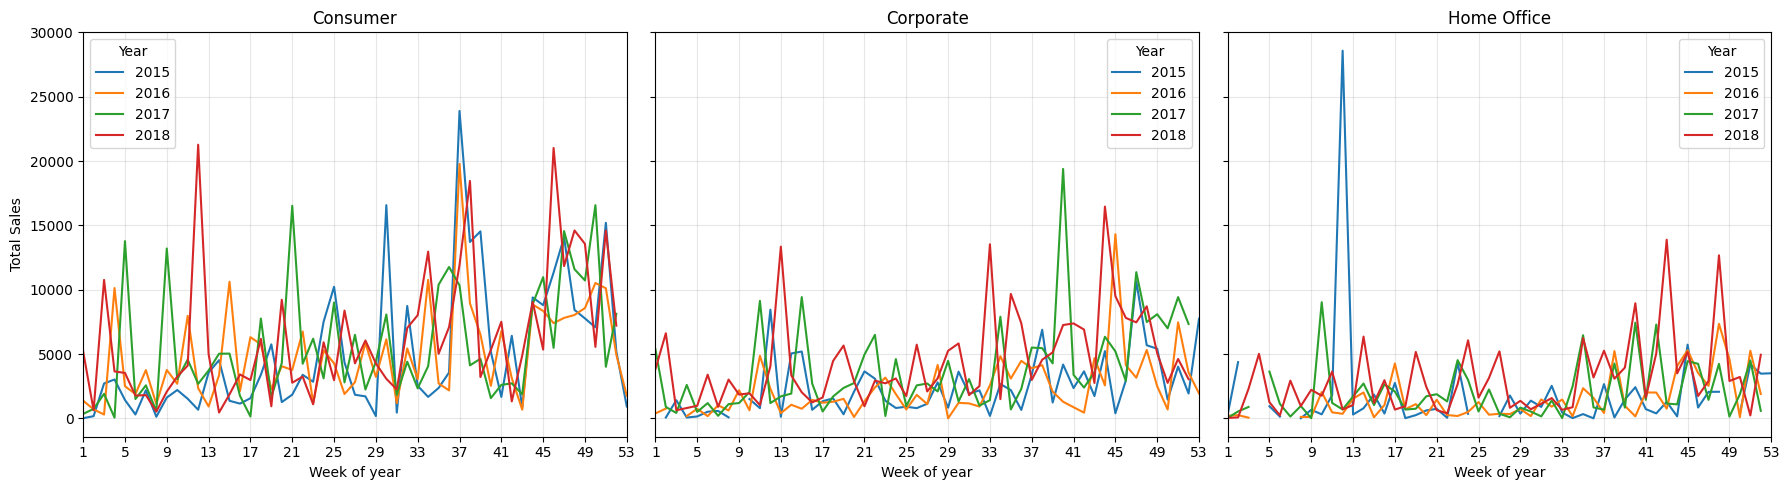

In [62]:
## WEEKLY TREND BY SEGMENT ##
seg_weekly = (retail_data
          .groupby(["Segment", "Year", "Week_of_year"], as_index=False)["Sales"].sum())

segments_w = seg_weekly["Segment"].unique()
fig, axes = plt.subplots(1, len(segments_w), figsize=(6*len(segments_w), 5), sharey=True)

if len(segments_w) == 1:
    axes = [axes]

for ax, seg in zip(axes, segments_w):
    b = seg_weekly[seg_weekly["Segment"] == seg]
    piv = b.pivot(index="Week_of_year", columns="Year", values="Sales")
    piv = piv.reindex(range(1, 54), fill_value=0)
    piv.plot(ax=ax)
    ax.set_title(f"{seg}")
    ax.set_xlabel("Week of year"); ax.set_ylabel("Total Sales")
    ax.set_xlim(1, 53)
    ax.grid(True, alpha=0.3); ax.set_xticks(range(1, 54, 4))

plt.tight_layout(); plt.show()

## Resample by week here

In [63]:
retail_data["Week_of_year"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

/var/folders/qw/q7626nwn3h97_4rct7m6kw4h0000gn/T/ipykernel_17218/3242169778.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


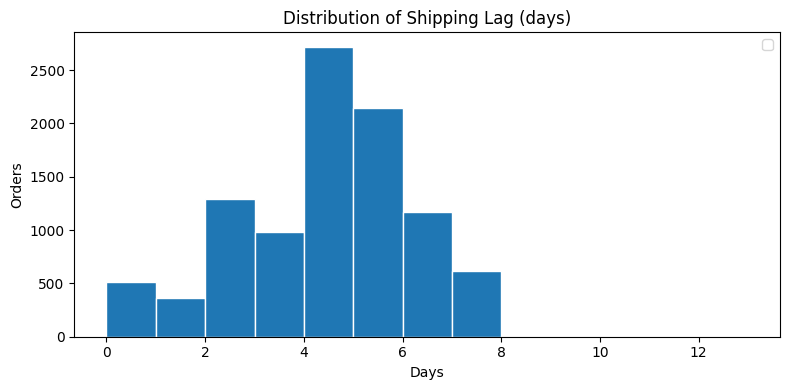

In [76]:
## SHIPPING LAG ##
retail_data["ship_lag_days"] = (retail_data["Ship Date"] - retail_data["Order Date"]).dt.days
plt.figure(figsize=(8,4))
plt.hist(retail_data["ship_lag_days"], bins=range(0, 14), edgecolor="white")
plt.title("Distribution of Shipping Lag (days)")
plt.xlabel("Days")
plt.ylabel("Orders")
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 800x400 with 0 Axes>

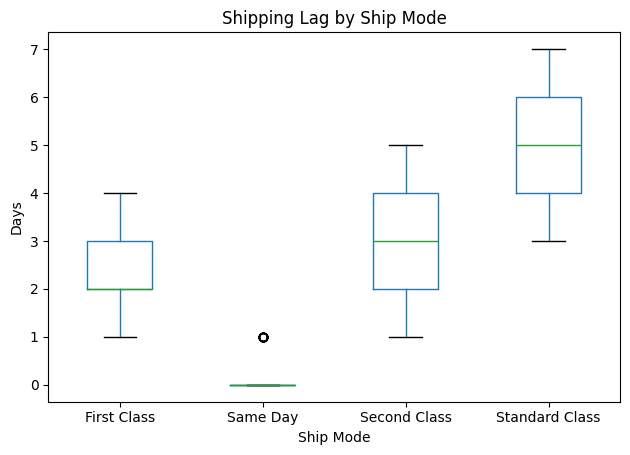

<Figure size 800x400 with 0 Axes>

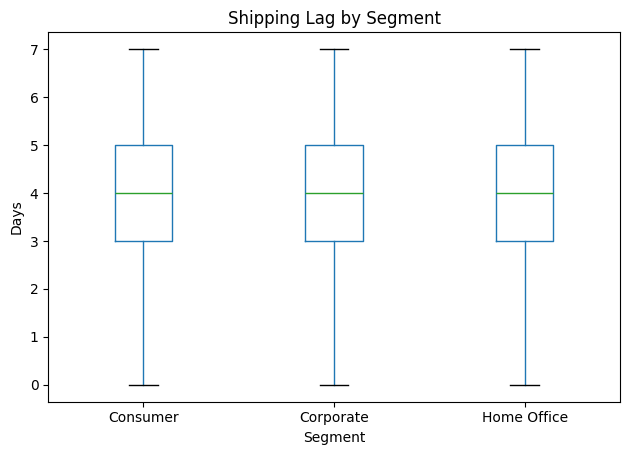

In [65]:
## SHIPPING LAG BY SHIP MODE ##
plt.figure(figsize=(8,4))
retail_data.boxplot(column="ship_lag_days", by="Ship Mode", grid=False)
plt.title("Shipping Lag by Ship Mode")
plt.suptitle("")
plt.xlabel("Ship Mode")
plt.ylabel("Days")
plt.tight_layout()
plt.show()

## SHIPPING LAG BY SEGMENT ##
plt.figure(figsize=(8,4))
retail_data.boxplot(column="ship_lag_days", by="Segment", grid=False)
plt.title("Shipping Lag by Segment")
plt.suptitle("")
plt.xlabel("Segment")
plt.ylabel("Days")
plt.tight_layout()
plt.show()

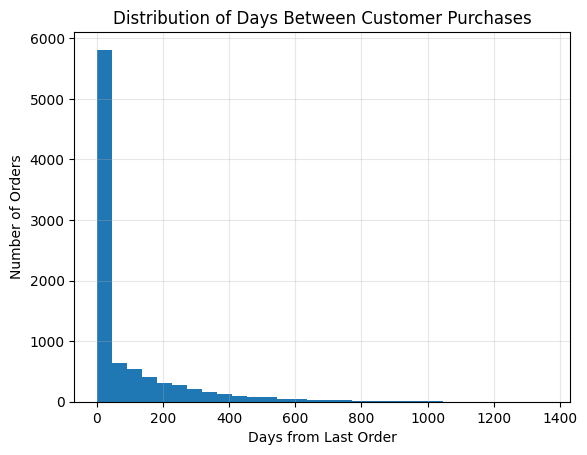

In [66]:
## RETURNIGN CUSTOMER ##
retail_data.drop(columns=[col for col in retail_data.columns if "days_from_last_order" in col], inplace=True)

return_cust = retail_data.sort_values(["Customer ID", "Order Date"])
return_cust["days_from_last_order"] = return_cust.groupby("Customer ID")["Order Date"].diff().dt.days
return_cust["orig_index"] = return_cust.index
return_days = return_cust[["orig_index", "days_from_last_order"]]
retail_data = retail_data.merge(return_days, left_index=True, right_on="orig_index", how="left").drop(columns=["orig_index"])

retail_data["days_from_last_order"].dropna().hist(bins=30)
plt.title("Distribution of Days Between Customer Purchases")
plt.xlabel("Days from Last Order")
plt.ylabel("Number of Orders")
plt.grid(True, alpha=0.3)
plt.show()

In [67]:
retail_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Year', 'Quarter', 'Month', 'Month_name',
       'Day_of_month', 'Day_of_year', 'Day_of_week', 'Weekday_name',
       'Week_of_year', 'ship_lag_days', 'days_from_last_order'],
      dtype='object')

In [68]:
## repeat orders per customer ##
repeat_counts = retail_data.groupby("Customer ID")["Order Date"].count()
repeat_counts = repeat_counts[repeat_counts > 1]  
print(repeat_counts)

## ADD THIS AS A COLUMN AND THINK ABOUT HOW THIS CAN BE USED TO MAKE PREDICTIONS.
## maybe I wanna figure out in the last year- which is the highest revnue generating year- how much of it is driven by returning vs new customers.


Customer ID
AA-10315    11
AA-10375    15
AA-10480    12
AA-10645    18
AB-10015     6
            ..
XP-21865    28
YC-21895     8
YS-21880    12
ZC-21910    31
ZD-21925     9
Name: Order Date, Length: 787, dtype: int64


In [69]:
retail_data["Year"].unique()

array([2015, 2016, 2017, 2018], dtype=int32)

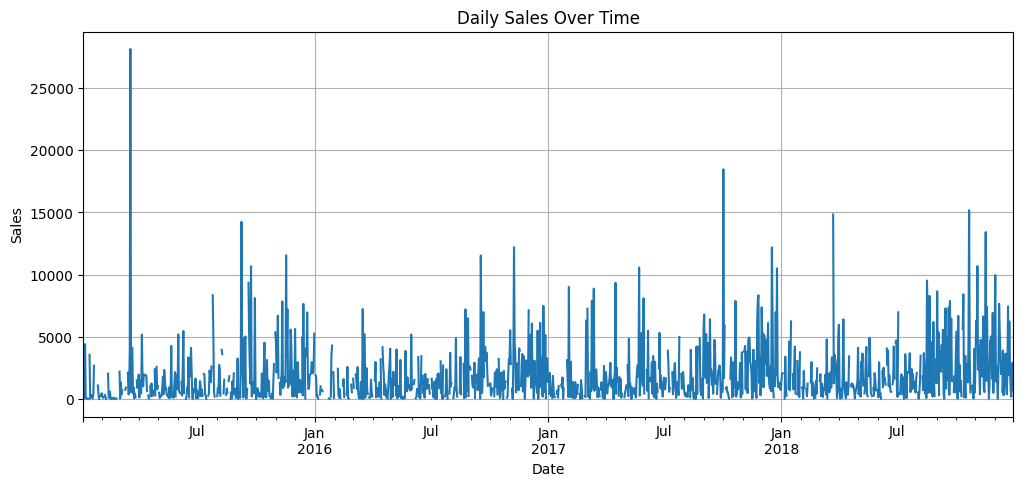

In [70]:
## CHECKING STATIONARITY ##
## this is key for ARIMA/ARMA ##
sales_stat = retail_data.groupby("Order Date")["Sales"].sum().asfreq("D")

plt.figure(figsize=(12, 5))
sales_stat.plot()
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()



ADF Statistic: -5.7611120929184985
p-value: 5.669526815779461e-07
Critical Value (1%): -3.435743555099632
Critical Value (5%): -2.8639217381867486
Critical Value (10%): -2.568038075665972


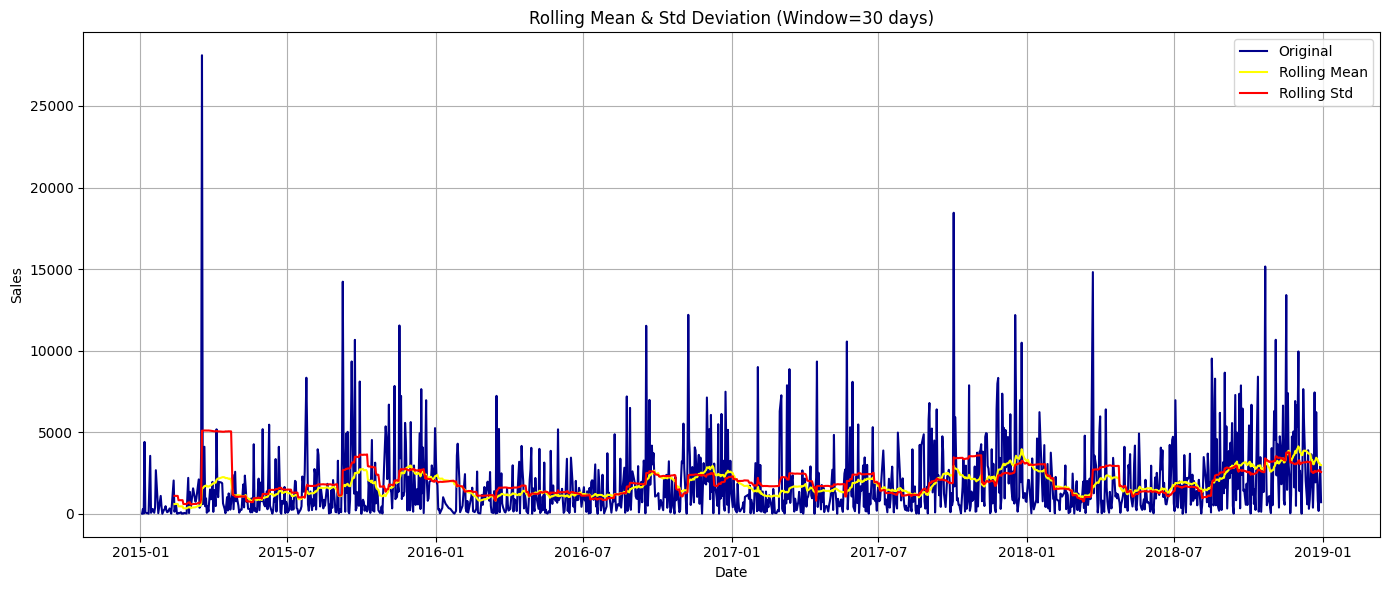

In [71]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales_stat.dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")


def check_mean_std(ts, window=30):
    rolmean = ts.rolling(window=window).mean()
    rolstd = ts.rolling(window=window).std()

    plt.figure(figsize=(14, 6))
    plt.plot(ts, color='darkblue', label='Original')            
    plt.plot(rolmean, color='yellow', label='Rolling Mean') 
    plt.plot(rolstd, color='red', label='Rolling Std')
    plt.title(f'Rolling Mean & Std Deviation (Window={window} days)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

check_mean_std(sales_stat.dropna())


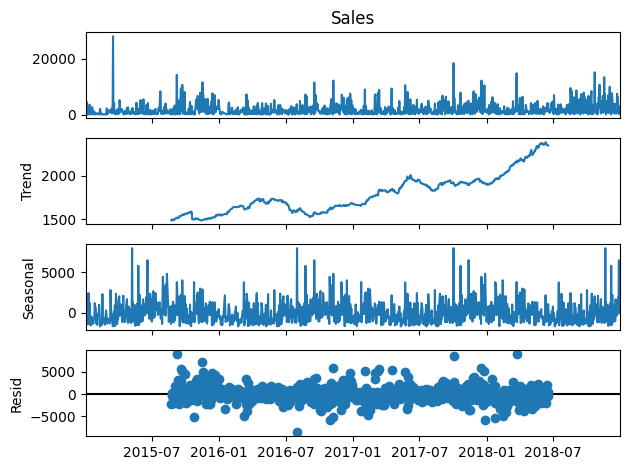

In [72]:
## TO ASSES MODEL TYPE NEEDED ##
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(sales_stat.dropna(), model='additive', period=365)
decomp.plot()
plt.show()
